### Análise de Regras de Associação para Recomendação de Filmes
___
#### **Objetivo**

Realizar o carregamento, preparação e análise exploratória dos dados de avaliações e filmes, identificando padrões iniciais como distribuição das notas, filmes e gêneros mais populares, e tendências de lançamentos ao longo dos anos.
___

#### 1.0 Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import re  

#### 2.0 Carregando os dados

In [2]:
ratings = 'ratings_alterado.csv'
df_ratings = pd.read_csv(ratings,delimiter=';')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
movies = 'movies_alterado.csv'
df_movies = pd.read_csv(movies,delimiter=';')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### 3.0 Unindo os datasets

In [4]:
# Para criar um único conjunto de dados conectados foi utilizado o 'moveId' como index
df_combinado = pd.merge(df_ratings, df_movies, on='movieId', how='outer')
df_combinado.head()        

,userId,movieId,rating,timestamp,title,genres
0,2.0,1,3.5,1.141416e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3.0,1,4.0,1.439472e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,4.0,1,3.0,1.573944e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,5.0,1,4.0,8.586259e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,8.0,1,4.0,8.904925e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


 #### 4.0 Visão Geral dos Dados

 ##### 4.1 Informações Gerais    

In [5]:
# Informações de cada tipo de variável do df
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088758 entries, 0 to 1088757
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  float64
 1   movieId    1088758 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  float64
 4   title      1088758 non-null  object 
 5   genres     1088758 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 49.8+ MB


- A coluna `userId`, atualmente formatada como float, será convertida para int para ajustar o tipo de dado à sua natureza de identificador único.

In [6]:
# Verificação de valores nulos
df_combinado.isnull().sum()

userId       40183
movieId          0
rating       40183
timestamp    40183
title            0
genres           0
dtype: int64

In [7]:
# Substituindo os valores nulos para que seja possível converter para o tipo inteiro
df_combinado['userId'] = df_combinado['userId'].fillna(0.0)
df_combinado['userId'] = df_combinado['userId'].astype(int)
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088758 entries, 0 to 1088757
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1088758 non-null  int64  
 1   movieId    1088758 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  float64
 4   title      1088758 non-null  object 
 5   genres     1088758 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 49.8+ MB


 #### 4.2 Análise Descritiva

 ##### 4.2.1 Dados Numéricos    

In [8]:
# Contagem de usuários únicos
print(f"Número de usuários únicos: {df_combinado['userId'].nunique()}")
# Contagem de filmes únicos
print(f"Número de filmes únicos: {df_combinado['movieId'].nunique()}")
# Contagem de gêneros únicos
print(f"Número de conjunto de gêneros: {df_combinado['genres'].nunique()}")


Número de usuários únicos: 7046
Número de filmes únicos: 62423
Número de conjunto de gêneros: 1639


In [9]:
# Contagem de avaliações por usuário
contagem_avaliacoes_por_usuario = df_combinado['userId'].value_counts()

# Calcula a média da quantidade de avaliações por usuário
media_avaliacoes_por_usuario = contagem_avaliacoes_por_usuario.mean()
print(f"Média de avaliações por usuário: {media_avaliacoes_por_usuario:.2f}")

# Encontra o maior número de avaliações por usuário
maior_numero_avaliacoes = contagem_avaliacoes_por_usuario.max()
print(f"Maior número de avaliações por usuário: {maior_numero_avaliacoes}")

# Encontra o menor número de avaliações por usuário
menor_numero_avaliacoes = contagem_avaliacoes_por_usuario.min()
print(f"Menor número de avaliações por usuário: {menor_numero_avaliacoes}")

Média de avaliações por usuário: 154.52
Maior número de avaliações por usuário: 40183
Menor número de avaliações por usuário: 20


In [10]:
df_combinado.describe()

,userId,movieId,rating,timestamp
count,1.088758e+06,1.088758e+06,1.048575e+06,1.048575e+06
mean,3.443146e+03,2.590168e+04,3.535808e+00,1.209524e+09
std,2.090502e+03,4.604804e+04,1.056276e+00,2.300684e+08
min,0.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.650000e+03,1.198000e+03,3.000000e+00,9.999707e+08
50%,3.472000e+03,3.006000e+03,3.500000e+00,1.183782e+09
75%,5.247000e+03,3.141000e+04,4.000000e+00,1.446632e+09
max,7.045000e+03,2.091710e+05,5.000000e+00,1.574288e+09


 - A nota média das avaliações é aproximadamente 3.53.
 - Existem 1.048.575 registros de avaliações com um `userId` válido. 
 - Existem 7.045 usuários únidos que contribuíram para estas avaliações.
 - A contagem de registros na coluna `movieI` (1.088.758) é superior à da coluna `rating` (1.048.575), indicando que há filmes que não possuem avaliações.
  Esses valores serão tratados posteriormente.

 #### 5.0 EDA - Exploração dos Dados

 ##### 5.1 Distribuição de avaliações dos usuários

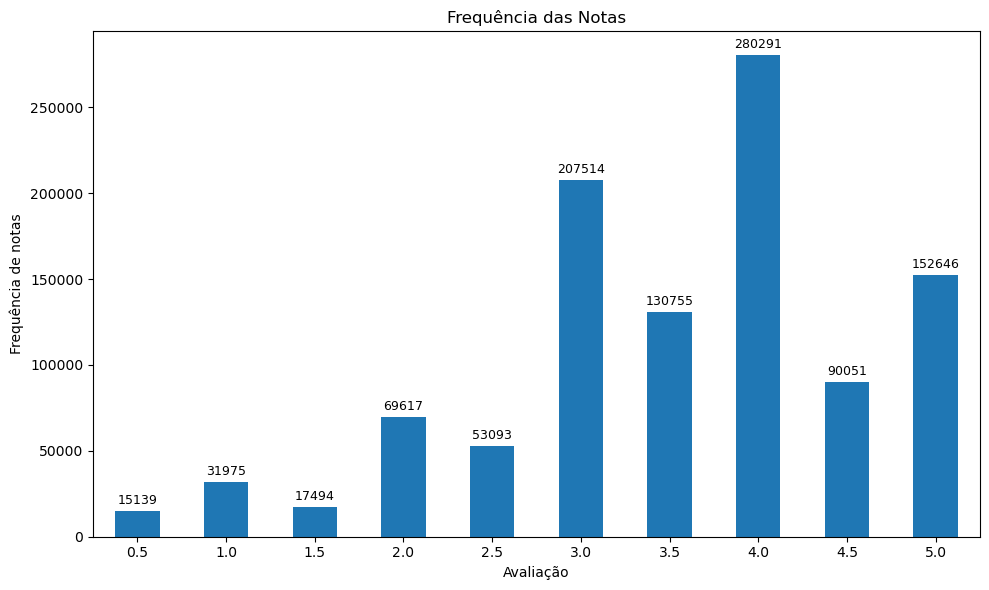

In [11]:
# Armazena essa Série de dados na variável 'dados'.
dados = df_combinado['rating'].value_counts().sort_index()

# Armazena o objeto dos eixos do gráfico na variável 'ax' para poder customizá-lo depois.
ax = dados.plot(kind='bar', figsize=(10, 6), title='Frequência das Notas')

# Inicia um loop que vai percorrer cada uma das barras desenhadas no gráfico 
for bar in ax.patches:
    # A função 'annotate' é usada para escrever texto no gráfico.
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', fontsize=9)

# Estilização e Exibição do Gráfico   
plt.xlabel('Avaliação')
plt.ylabel('Frequência de notas')
plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()


**Conclusões:**

A nota 4.0 foi a mais frequente entre as avaliações, seguida pelas notas 3.0 e 5.0, que completam as três mais comuns.

 ##### 5.2 Distribuição dos top 10 filmes mais avaliados

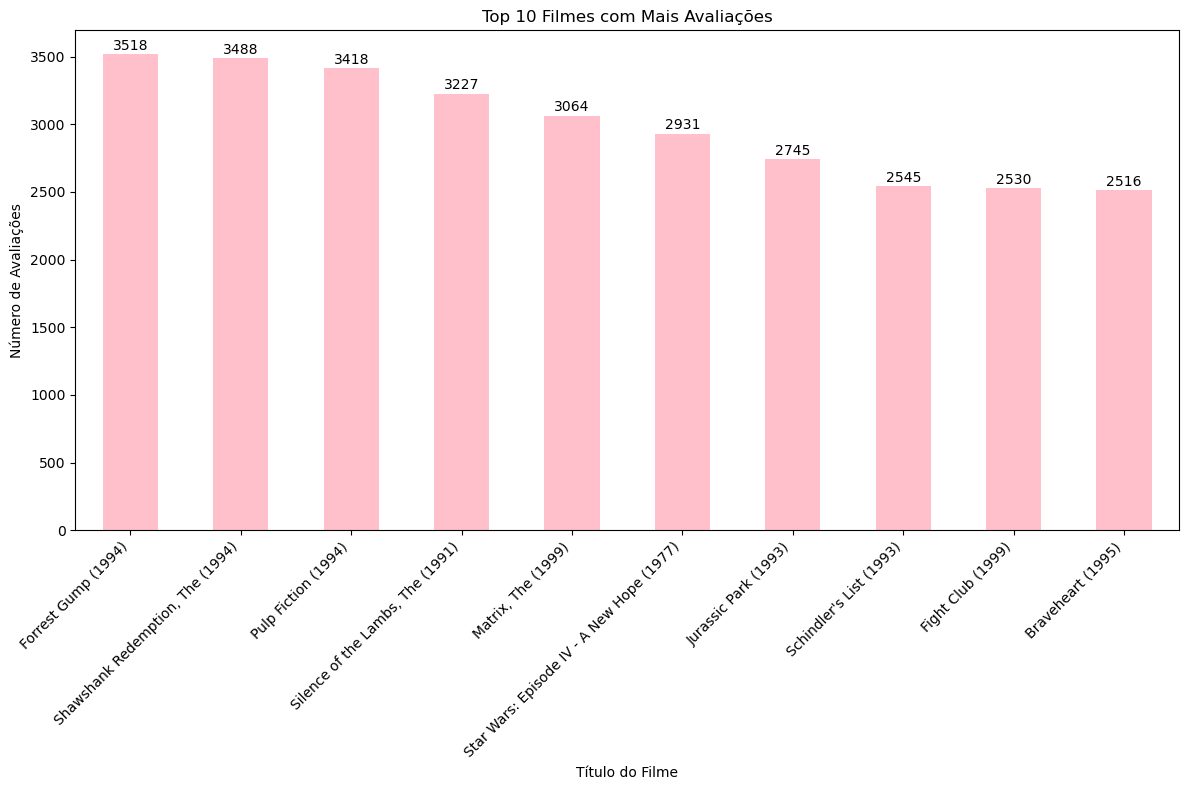

In [12]:
# Contagem de avaliações por movieId
contagem_ratings_por_filme_id = df_combinado['movieId'].value_counts()

# Seleciona os top 10 movieIds com mais avaliações
top_10_filme_ids = contagem_ratings_por_filme_id.head(10).index

# Deste DataFrame filtrado, seleciona a coluna 'title' e faz um .value_counts()
# nela para obter a contagem de avaliações, agora com os títulos dos filmes.
top_10_filmes = df_combinado[df_combinado['movieId'].isin(top_10_filme_ids)]['title'].value_counts()

plt.figure(figsize=(12, 8)) 

# Armazena o objeto dos eixos na variável 'ax' para permitir customizações futuras.
ax = top_10_filmes.plot(kind='bar', color='pink')

# Inicia um loop que vai percorrer cada uma das 10 barras desenhadas no gráfico ('ax.patches').
for bar in ax.patches:
    # A função 'annotate' é usada para escrever texto no gráfico.
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points',
                ha='center', fontsize=10)
    
# Estilização Final e Exibição do Gráfico
plt.title('Top 10 Filmes com Mais Avaliações')
plt.xlabel('Título do Filme')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

**Conclusões:**

Os filmes mais bem avaliados foram `Forrest Gump (1994)`, `The Shawshank Redemption (1994)` e `Pulp Fiction (1994)`.

 ##### 5.3 Distribuição dos filmes por ano de lançamento

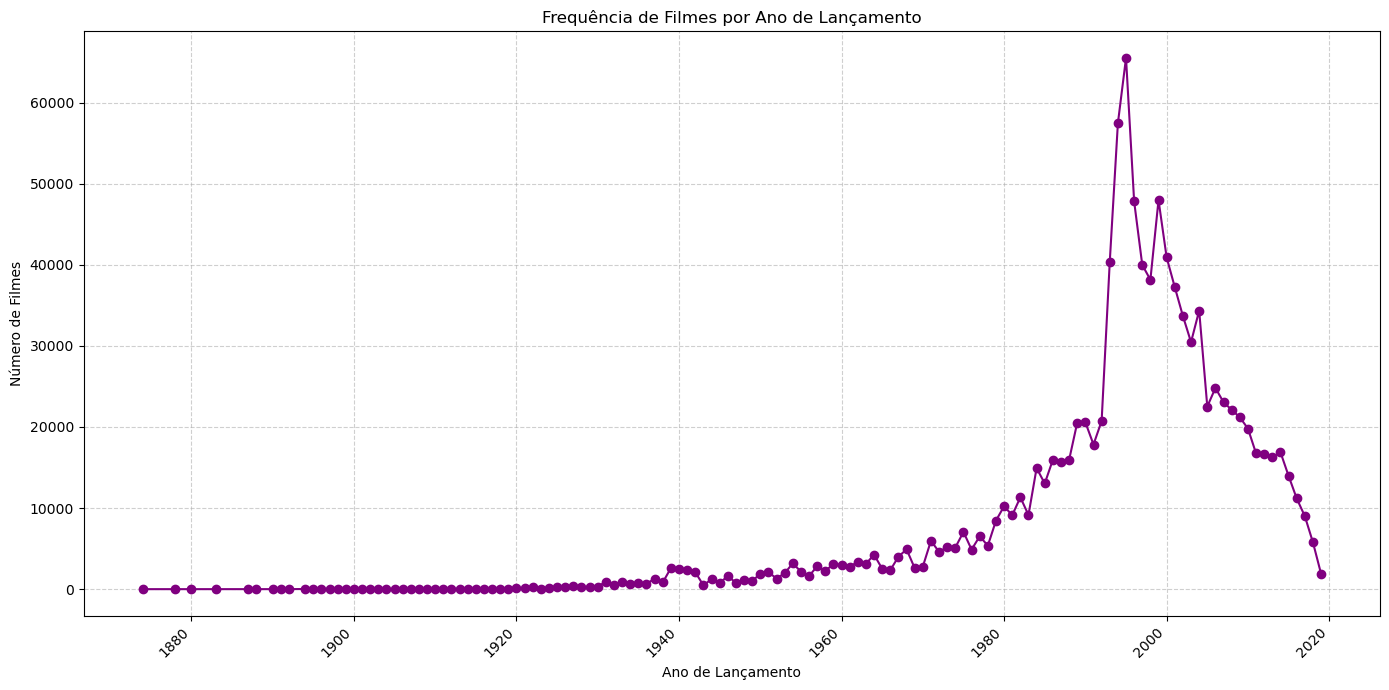


Top 10 anos com mais lançamentos em ordem decrescente:
ano
1995    65517
1994    57450
1999    47987
1996    47815
2000    40906
1993    40366
1997    39980
1998    38160
2001    37250
2004    34354
Name: count, dtype: int64


In [13]:
# Na coluna 'title' contém o nome do filme e o ano de lançamento
def extrair_ano(titulo):
    # Sua função está perfeita, não precisa mudar nada aqui.
    if isinstance(titulo, str): # Adicionei uma verificação para evitar erros se o título for nulo
        match = re.search(r'\((\d{4})\)', titulo)
        if match:
            return int(match.group(1))
    return None

df_combinado['ano'] = df_combinado['title'].apply(extrair_ano)

# Tratamento dos dados faltantes : Remoção das linhas onde não possui informações sobre o ano
df_combinado_com_ano = df_combinado.dropna(subset=['ano'])

# Converte a coluna 'ano' do tipo float para o tipo inteiro.
df_combinado_com_ano = df_combinado[df_combinado['ano'].notnull()].copy()
df_combinado_com_ano['ano'] = df_combinado_com_ano['ano'].astype(int)

# Calcula a frequência de filmes por ano de lançamento
frequencia_por_ano = df_combinado_com_ano['ano'].value_counts()

plt.figure(figsize=(14, 7))
frequencia_por_ano.sort_index().plot(kind='line', marker='o', linestyle='-', color='purple')

# Estilização Final e Exibição do Gráfico
plt.title('Frequência de Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nTop 10 anos com mais lançamentos em ordem decrescente:")
print(frequencia_por_ano.nlargest(10))

**Conclusões:**

Considerando a linha temporal dos anos de lançamento dos filmes presentes no dataset de 1874 à 2019. Os anos que mais tiveram lançamentos foram 1995, 1994 e 1999.

 ##### 5.4 Distribuição dos top 10 Gêneros mais frequentes

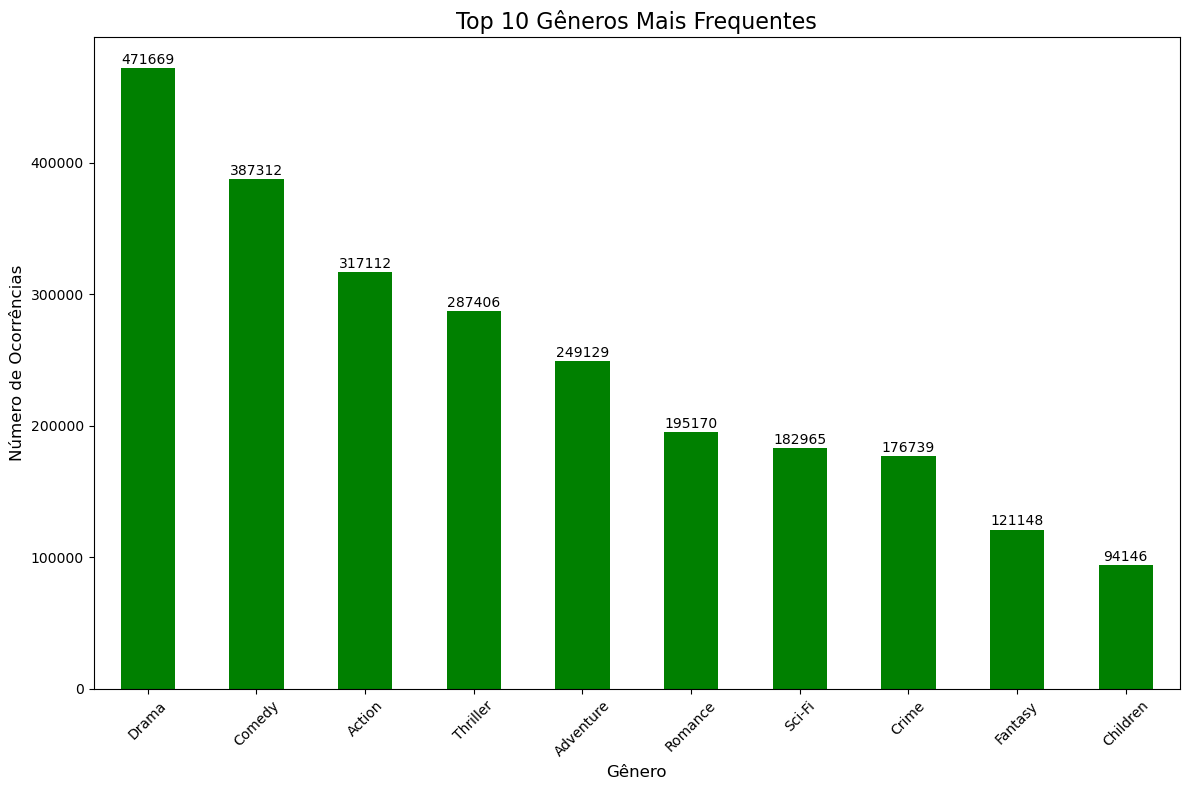

In [14]:
# Separa o cojunto dos gêneros por filme e cria uma lista de gêneros por filme 
# Considerando que em um mesmo filme pode ter mais de um gênero associado (ex: Drama|Romance)
df_combinado['lista_generos'] = df_combinado['genres'].str.split('|')

# A função explode foi utilizada para ter cada gênero de um mesmo filme, separado individualmente 
# Por exemplo: o filme Pulp Fiction terá 4 linhas, e cada linha terá um gênero separado que está presente no respectivo filme
df_generos_separados = df_combinado.explode('lista_generos')

# Conta a frequência de cada gênero
contagem_por_genero = df_generos_separados['lista_generos'].value_counts()

# Seleciona os 10 mais frequentes
top_10_generos = contagem_por_genero.head(10)

# Cria a figura e os eixos com o tamanho desejado PRIMEIRO
fig, ax = plt.subplots(figsize=(12, 8))

# Armazena o objeto dos eixos na variável 'ax' para permitir customizações futuras.
top_10_generos.plot(kind='bar', ax=ax, color='green')

# Inicia um loop que vai percorrer cada uma das 10 barras desenhadas no gráfico ('ax.patches').
for bar in ax.patches:
    # A função 'annotate' é usada para escrever texto no gráfico.
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points',
                ha='center', fontsize=10)

# Estilização Final e Exibição do Gráfico
ax.set_title('Top 10 Gêneros Mais Frequentes', fontsize=16)
ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Número de Ocorrências', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


**Conclusões:**

Os gêneros de filmes mais frequentes foram `Drama`,`Comédia` e `Ação`.

### Conclusão Geral

Através da análise exploratória realizada, foi possível obter uma compreensão sólida sobre o perfil das avaliações, tendências dos usuários e características dos filmes do conjunto de dados. Identificou-se que a maioria das notas atribuídas pelos usuários está concentrada em valores intermediários, especialmente nas notas 3.0, 4.0 e 5.0, o que sugere um comportamento moderado e relativamente positivo por parte da maioria dos avaliadores.

Além disso, observou-se que filmes lançados nos anos 1990, como *Forrest Gump* e *The Shawshank Redemption*, continuam sendo os mais populares e frequentemente avaliados, indicando uma forte representatividade de títulos clássicos no gosto dos usuários. Os dados também revelaram uma grande diversidade de gêneros e uma ampla variedade de filmes presentes na base, reforçando o potencial para a aplicação de técnicas de recomendação.

A análise evidenciou a necessidade de eventualmente aprofundar a investigação sobre possíveis vieses, como a predominância de certos gêneros ou períodos de lançamento.

Esses insights iniciais servem como base para etapas posteriores de modelagem, incluindo o uso de algoritmos de Regras de Associação para recomendações personalizadas, e indicam que o conjunto de dados é robusto e oferece boas oportunidades para extração de conhecimento relevante sobre preferências cinematográficas.